# **Student Performance in Exams**

This notebook works on a dataset taken from [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.). The dataset is **entirely fictional**, and the results of both this experiment, and the implications of the data examined, should not be taken seriously. The goal of this project is purely to examine various techniques used in machine learning to predict outcomes based on previously gathered data.

### **The examined features**
The dataset provides various features on which the model can base its predictions. These are the **gender**, **race/ethnicity** and **parental level of education** of the student, as well as whether or not the student **has been provided with reduced-priced lunch** or **has taken a preparation course for the exams**.

### **The predicted classes**
The dataset also provides outcome that will later be predicted by the machine learning model. These are the students scores, from 0-100, in the **math**, **writing** and **reading** exams.

## Import extraneous data
Since this notebook was developed on the **Google Colab** platform, and requires data and functions defined in other files, it is necessary to import the contents of the **Google Drive** folder containing them. The _%cd_ magic function changes the active directory to be the one containing the project files on the user's Google Drive.

In [1]:
import platform

if 'google.colab' in str(get_ipython()):
    from google.colab import drive

    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/Machine Learning

Mounted at /content/drive
/content/drive/MyDrive/Machine Learning


The other two notebooks that this project comprises of are:
- _preprocessing.ipynb_, containing definitions of the functions performing preprocessing on the dataset
- _models.ipynb_, containing the functions that train machine learning models used to predict students scores

In [2]:
%run ./preprocessing.ipynb
%run ./models.ipynb

The _csv_data_file_ file contains the examined data. It is imported into a **pandas dataframe**, a structure that allows easy manipulation and use by machine learning models.

In [3]:
csv_data_file = './StudentsPerformance.csv'

df = importDataframe(csv_data_file)

print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

Some machine learning models were designed to predict categories the data points falls into, instead of precise results. These models should be used to predict e.x. whether or not the student has passed or failed an exam. This project assumes that a passing grade is 50%, and creates three new columns:

- **math score descritized**
- **writing score descritized**
- **reading score descritized**

These are boolean values that are true if the student has passed the exam and false when they have not.

In [4]:
descretize_result(df)

The _configureCategories()_ method is used to extract data about names of columns used in predicting the outcome, as well as the names of classes which values are going to be predicted and other columns that are not going to be used at all in our prediction. This data was previously configured in the _preprocessing.ipynb_ file.

In [5]:
CategoricalColumns, Scores, Class = configureCategories(df)

We can now print graphs showing the distributions of various data in our dataframe. The test scores follow the predictable bell curve of the standard distribution.

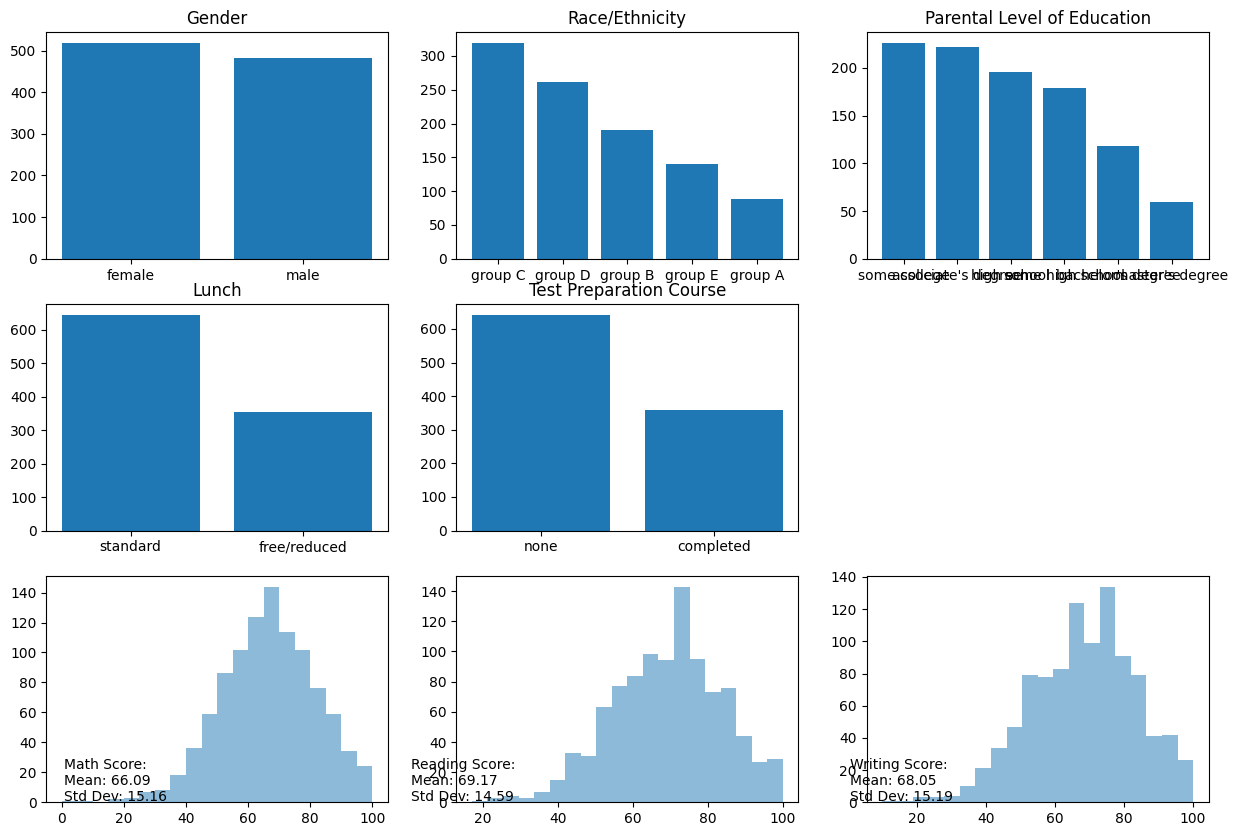

In [6]:
plot_bars_and_histograms(df)

We can also plot the relationship between the dataframes features and the predicted classes. Using the scipy.stats library we can calculate the p-values, that determine the relevancy of each feature. This p-value will be used later to select the best columns to base our prediction on, using the "select K best" method.

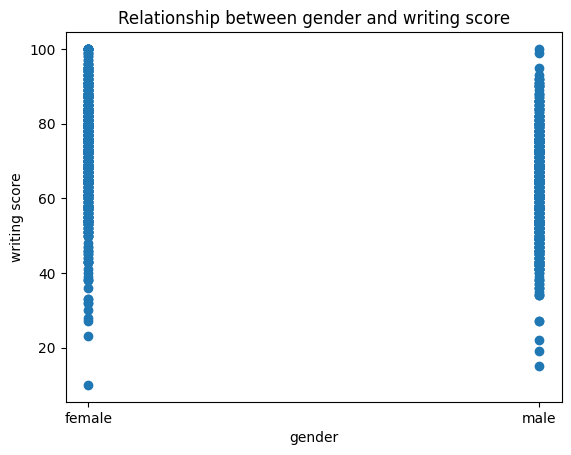

p-value: 2.019877706867934e-22


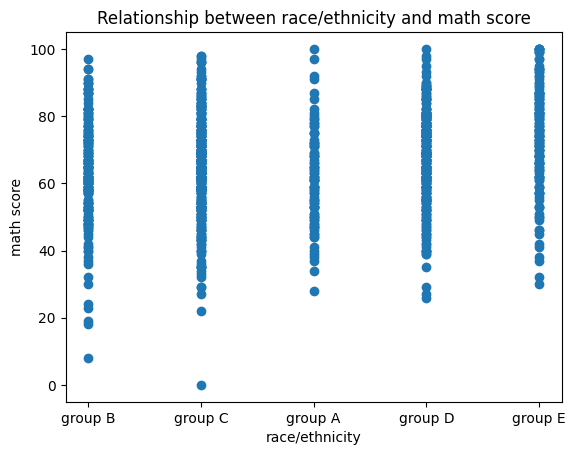

p-value: 0.3503415961659957


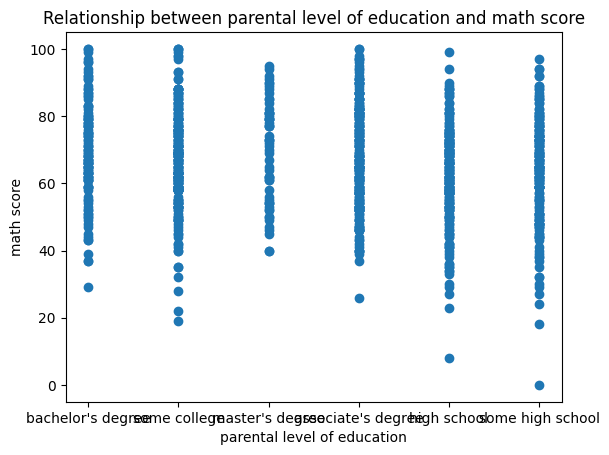

p-value: 0.388108610360687


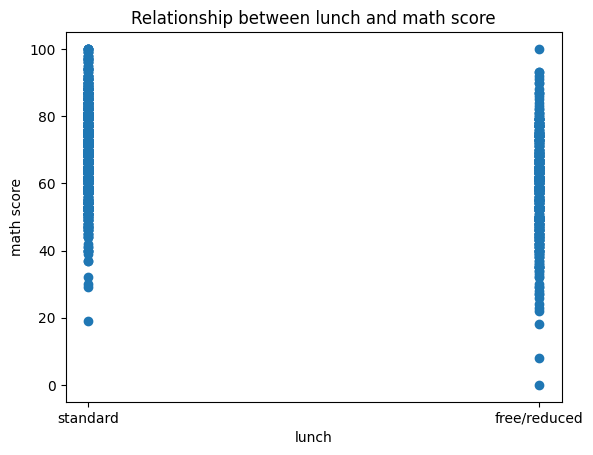

p-value: 2.4131955993137074e-30


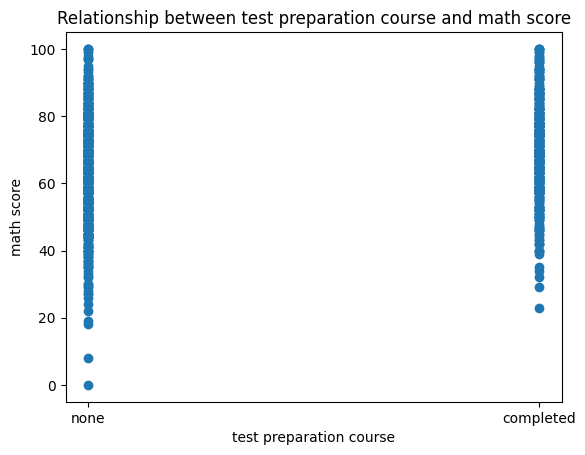

p-value: 1.5359134607147415e-08


In [7]:
plotRelationship(df, "gender", "writing score", ["male", "female"])
plotRelationship(df, "race/ethnicity", "math score", ["group A", "group B", "group C", "group D", "group E"])
plotRelationship(df, "parental level of education", "math score", ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"])
plotRelationship(df, "lunch", "math score", ["standard", "free/reduced"])
plotRelationship(df, "test preparation course", "math score", ["none", "completed"])

The data in the dataframe is formated using strings that represent each value. For example, the gender column can have values of either male or female. We can't simply feed those into the machine learning model, as it requires clear integer values. We can help alleviate this problem by mapping every possible string that occurs inside the column to a single chosen integer value. For example, we can map the "male" value to 0 and "female" value to 1, thus reducing the text values to numbers that can be used by the model.

In [8]:
label_encoding(df)

This simple method of encoding has one caveat. When encoding columns with multiple column values we need more than two integer values to represent the entire column. This presents an interesting conundrum when examining features like _race/ethnicity_, since encoding _group A_ as 0, _group B_ as 1 and _group C_ as 2 implies that _group A_ is somehow less than _group C_ and that _group B_ lies in between them. We can solve this problem by using the so called _one hot encoding_. It entails breaking up the problematic column into separate columns, each corresponding to a possible value of the original one. After that we assign the boolean value true (or 1) to each column in which the record belonged to said category, and false (or 0) to the rest. In this way we can avoid the model thinking that there is some sort of sense of progression in the values.

We shouldn't use it though in features such as _parental level of education_. _Some college_ encoded as 2 is indeed less than _master's degree_ encoded as 5, and _bachelor's degree_ encoded by 4 should lay in between them.

In [9]:
df = one_hot_encoding(df)

     gender race/ethnicity  parental level of education  lunch  \
0         1        group B                            4      1   
1         1        group C                            2      1   
2         1        group B                            5      1   
3         0        group A                            3      0   
4         0        group C                            2      1   
..      ...            ...                          ...    ...   
995       1        group E                            5      1   
996       0        group C                            1      0   
997       1        group C                            1      0   
998       1        group D                            2      1   
999       1        group D                            2      0   

     test preparation course  math score  reading score  writing score  \
0                          0          72             72             74   
1                          1          69             90    

Another imporant aspect of preprocesing our data, is removing the outliers, or suspected bad data from the dataframe. The method we use is to devide that data into equal sized "quantiles" each covering 25% of the most commonly occuring data points. We get rid of the datapoints that lie beyond 1.5 times what is present in the most common 50% of the datapoints (the interquantile range)

In [10]:
remove_outliers(df)

Let's look at our dataframe after doing all the preprocessing:

In [11]:
print(df)

     gender race/ethnicity  parental level of education  lunch  \
0         1        group B                            4      1   
1         1        group C                            2      1   
2         1        group B                            5      1   
3         0        group A                            3      0   
4         0        group C                            2      1   
..      ...            ...                          ...    ...   
995       1        group E                            5      1   
996       0        group C                            1      0   
997       1        group C                            1      0   
998       1        group D                            2      1   
999       1        group D                            2      0   

     test preparation course  math score  reading score  writing score  \
0                          0          72             72             74   
1                          1          69             90    

Before training our model, we need to select columns that will actually participate in the training of our models.
We will prepare a couple of such column sets, firstly by chosing them by hand, and then by utalizing the "select K best" algoritm.
The data sets selected by hand are
- _no scores_ which includes every single column except the exam scores
- _no scores and no race_ which includes what was included previously except the columns representing ethnicity
- _scores_ which includes every single column in the dataframe, including scores from exams other than the one we try to predict
- _score and no race_ which includes every single column in the dataframe except the one representing ethnicity

The next 3 data sets were selected using the "select K best" algorithm, which selects k (in our case 2, 5, and 7) best column based on their relevancy to the outcome, which was computed utalizing the p-values

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

prediction_data_sets = {}
prediction_data_sets['No scores'] = df[['gender', 'parental level of education', 'group A', 'group B', 'group C', 'group D', 'group E', 'lunch', 'test preparation course']]
prediction_data_sets['No scores and no race'] = df[['gender', 'parental level of education', 'lunch', 'test preparation course']]
prediction_data_sets['Scores'] = df[['gender', 'parental level of education', 'group A', 'group B', 'group C', 'group D', 'group E', 'lunch', 'test preparation course', 'reading score', 'writing score']]
prediction_data_sets['Scores and no race'] = df[['gender', 'lunch', 'test preparation course', 'reading score', 'writing score']]
prediction_data_sets['SelectKBest2'] = generate_data_set_selectkbest(2)
prediction_data_sets['SelectKBest5'] = generate_data_set_selectkbest(5)
prediction_data_sets['SelectKBest7'] = generate_data_set_selectkbest(7)

['reading score', 'writing score', 'math score discretized']
k 2: ['parental level of education', 'group E']
['reading score', 'writing score', 'math score discretized']
k 5: ['parental level of education', 'lunch', 'group A', 'group B', 'group E']
['reading score', 'writing score', 'math score discretized']
k 7: ['parental level of education', 'lunch', 'test preparation course', 'group A', 'group B', 'group D', 'group E']


We will train the following machine learning models with each data set:
- _logisitc regression_ which predicts simple categorical outcomes, like if a test was passed or not.
- _decision tree_ which constructs a flowchart-like structure in memory that has every possible category as its outcome. It first takes the first feature's value, decides to which flowchart block to travel next, and takes the next value, repeating the process until reaching an outcome.
- _random forest classifier_ which is a so called "ensemble learning" model. It constructs several trees based on different portions of the data set, and then uses all of them to predict outcomes. The model then uses majority voting to select the final answer.
- _linear regression_ tries to predict the actual score of the student, instead of just the student "passing" or "failing".
- _neural network_ which constructs a structure in memory simillar to the human brain, that utalizes nodes containing methmatical functions to manipulate the input data and pass it to further nodes. After going through several layers of such nodes, the final output should be the desired result.
- _voting regressor_ which is another ensemble learning model. It constructs several other models (in our case linear regression and neural network) several times and then uses them to predict the outcome, compiling the answer from all of them to provide the final result.

The _num iterations_ variable sets the amount of times the models will be trained. The final result will be the average performance of each model, as calculated using the scikit learn's libraries _score()_ method, that calculates the percentage of the correctly guessed answers in the case of classification and the r^2 score in the case of regression models.

In [13]:
import matplotlib.pyplot as plt

logistic_regression_result = {}
decision_tree_result = {}
random_forest_result = {}
linear_regression_result = {}
neural_network_result = {}
voting_regressor_result = {}

logistic_regression_result_roc = {}
decision_tree_result_roc = {}
random_forest_result_roc = {}

num_iterations = 1

def run_model_iteration(model_func, result_dict, roc_dict, prediction_data):
  result_dict[name] = 0
  for i in range(1, num_iterations+1):
    print(f"Iteration {i}:")
    accuracy, *roc = model_func(prediction_data)
    result_dict[name] += accuracy
    if (roc[0] != None):
      roc_dict[name] = roc

  result_dict[name] /= num_iterations

for name, prediction_data in prediction_data_sets.items():
  print(f"====={name}=====")
  print(f"---Logistic Regression---")
  run_model_iteration(model_logistic_regression, logistic_regression_result, logistic_regression_result_roc, prediction_data)
  print(f"---Decision Tree---")
  run_model_iteration(model_decision_tree, decision_tree_result, decision_tree_result_roc, prediction_data)
  print(f"---Random Forest Classifier---")
  run_model_iteration(model_random_forest, random_forest_result, random_forest_result_roc, prediction_data)
  print(f"---Linear Regression---")
  run_model_iteration(model_linear_regression, linear_regression_result, None, prediction_data)
  print(f"---Neural Network---")
  run_model_iteration(model_neural_network, neural_network_result, None, prediction_data)
  print(f"---Voting Regressor---")
  run_model_iteration(model_voting_regressor, voting_regressor_result, None, prediction_data)

=====No scores=====
---Logistic Regression---
Iteration 1:
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'C': 1}
Accuracy: 0.86
ROC AUC: 0.7405726961080863
---Decision Tree---
Iteration 1:
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'ccp_alpha': 0.0}
Accuracy: 0.855
ROC AUC: 0.7244318181818182
---Random Forest Classifier---
Iteration 1:
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}
Accuracy: 0.835
ROC AUC: 0.6814316087880936
---Linear Regression---
Iteration 1:
Best Hyperparameters: {'fit_intercept': False}
Accuracy: 0.2887081517826272
MAE: 10.625903426344362
MSE: 178.29438850904546
RMSE: 13.35269218206746
---Neural Network---
Iteration 1:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best Hyperparameters: {'solver': 'adam', 'hidden_layer_sizes': (200, 200), 'activation': 'tanh'}
Accuracy: 0.13496042296267186
MAE: 11.125955672876549
MSE: 195.70819748412148
RMSE: 13.989574599826883
---Voting Regressor---
Iteration 1:
Best Hyperparameters: {'linear_regression__fit_intercept': False}
Ensemble Accuracy: 0.13513984744390595
Ensemble MAE: 11.344770518235805
Ensemble MSE: 187.14328302694193
Ensemble RMSE: 13.680032274338462
=====No scores and no race=====
---Logistic Regression---
Iteration 1:
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'C': 10}
Accuracy: 0.87
ROC AUC: 0.8554376657824934
---Decision Tree---
Iteration 1:
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'ccp_alpha': 0.0}
Accuracy: 0.865
ROC AUC: 0.7354111405835543
---Random Forest Classifier---
Iteration 1:
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best Hyperparameters:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Accuracy: 0.935
ROC AUC: 0.9682765151515151
---Decision Tree---
Iteration 1:
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0.01}
Accuracy: 0.91
ROC AUC: 0.9250538882440722
---Random Forest Classifier---
Iteration 1:
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Accuracy: 0.87
ROC AUC: 0.9303685329553508
---Linear Regression---
Iteration 1:
Best Hyperparameters: {'fit_intercept': True}
Accuracy: 0.8663852151360151
MAE: 4.398755245255138
MSE: 30.17115038541222
RMSE: 5.492827176000736
---Neural Network---
Iteration 1:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Best Hyperparameters: {'solver': 'lbfgs', 'hidden_layer_sizes': (100, 100), 'activation': 'tanh'}
Accuracy: 0.8588439088572235
MAE: 4.113820426428833
MSE: 27.81494538687299
RMSE: 5.2739876172468385
---Voting Regressor---
Iteration 1:
Best Hyperparameters: {'linear_regression__fit_intercept': False}
Ensemble Accuracy: 0.8654296451183372
Ensemble MAE: 4.563593062243286
Ensemble MSE: 31.661376670670435
Ensemble RMSE: 5.626844290601121
=====Scores and no race=====
---Logistic Regression---
Iteration 1:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Accuracy: 0.905
ROC AUC: 0.9585700757575758
---Decision Tree---
Iteration 1:
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0.01}
Accuracy: 0.94
ROC AUC: 0.8957545798197151
---Random Forest Classifier---
Iteration 1:
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}
Accuracy: 0.885
ROC AUC: 0.9369241672572644
---Linear Regression---
Iteration 1:
Best Hyperparameters: {'fit_intercept': True}
Accuracy: 0.8681571896475807
MAE: 4.416802385123847
MSE: 31.81102998576146
RMSE: 5.640126770362654
---Neural Network---
Iteration 1:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Best Hyperparameters: {'solver': 'lbfgs', 'hidden_layer_sizes': (100, 100), 'activation': 'tanh'}
Accuracy: 0.8145320223432195
MAE: 4.606141199365083
MSE: 34.07584143020316
RMSE: 5.8374516212302066
---Voting Regressor---
Iteration 1:
Best Hyperparameters: {'linear_regression__fit_intercept': False}
Ensemble Accuracy: 0.8579189299002956
Ensemble MAE: 4.746155659393236
Ensemble MSE: 33.52687011142724
Ensemble RMSE: 5.790239210207748
=====SelectKBest2=====
---Logistic Regression---
Iteration 1:
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'C': 10}
Accuracy: 0.885
ROC AUC: 0.5761483664947187
---Decision Tree---
Iteration 1:
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'ccp_alpha': 1.0}
Accuracy: 0.865
ROC AUC: 0.5
---Random Forest Classifier---
Iteration 1:
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best Hyperparameters: {'n_estimators': 300, 'min_s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best Hyperparameters: {'solver': 'adam', 'hidden_layer_sizes': (200, 200), 'activation': 'tanh'}
Accuracy: 0.19418697686658914
MAE: 10.461378216564675
MSE: 178.08435578727455
RMSE: 13.344825056450704
---Voting Regressor---
Iteration 1:
Best Hyperparameters: {'linear_regression__fit_intercept': False}
Ensemble Accuracy: -0.36479256826156714
Ensemble MAE: 13.235838471722854
Ensemble MSE: 278.77904687762117
Ensemble RMSE: 16.69667771976273


The results suggest simillar performance in each data set and machine learning model. The only significant differance occurs when including the scores from other exams, which is an expected outcome - students that score higher in one exam are probably the ones more likely to work hard and study for another.

The overall results were pretty satisfactory, although the ROC curves suggest that excluding scores from the prediction gives terrible results with a decision tree, not much better from random guessing. Excluding race however, slightly improves the curve, suggesting that it may be a problematic set of categories.

Logistic regression with No scores: 0.86


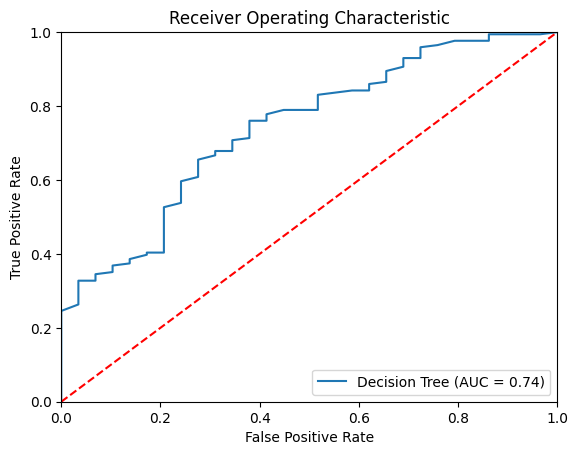

Logistic regression with No scores and no race: 0.87


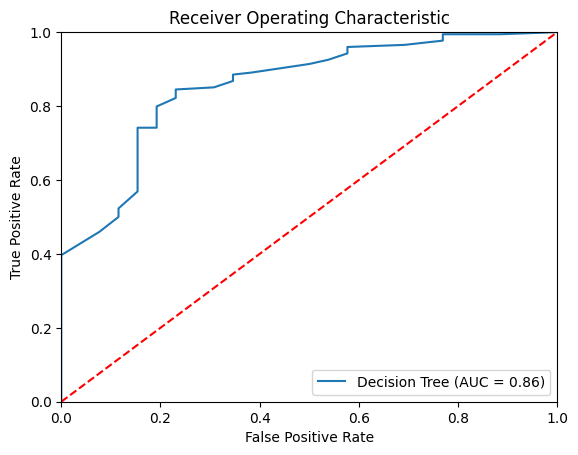

Logistic regression with Scores: 0.935


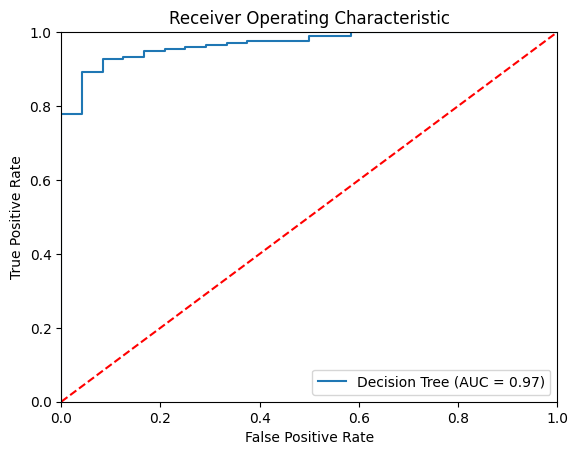

Logistic regression with Scores and no race: 0.905


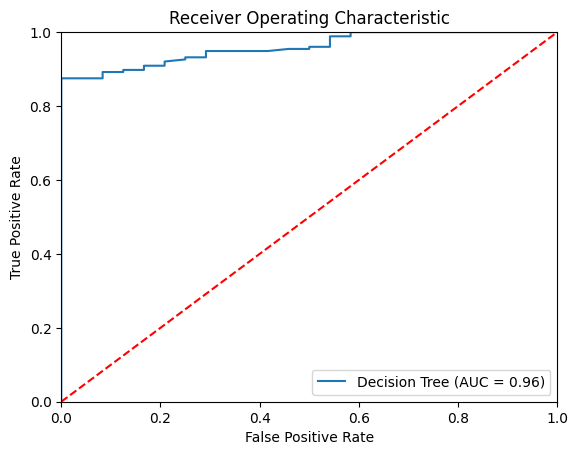

Logistic regression with SelectKBest2: 0.885


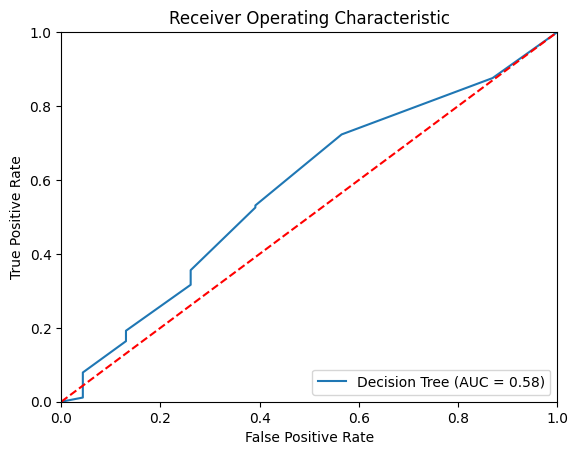

Logistic regression with SelectKBest5: 0.855


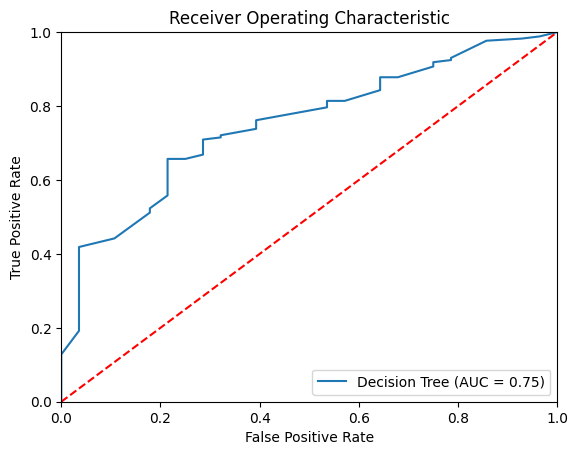

Logistic regression with SelectKBest7: 0.84


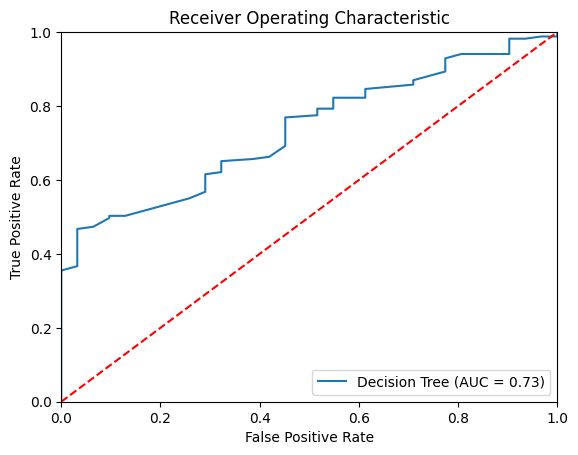


Logistic regression average: 0.8785714285714287

Decision tree with No scores: 0.855


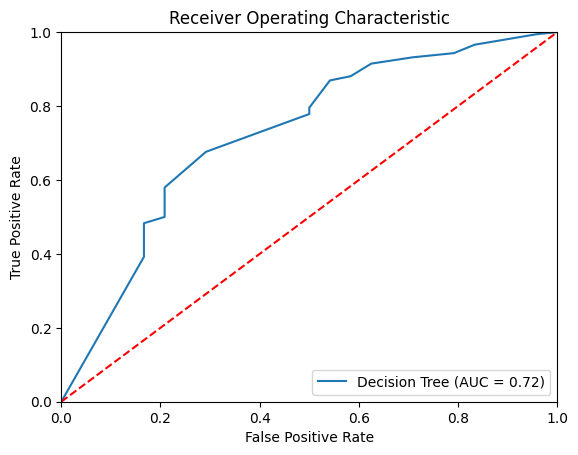

Decision tree with No scores and no race: 0.865


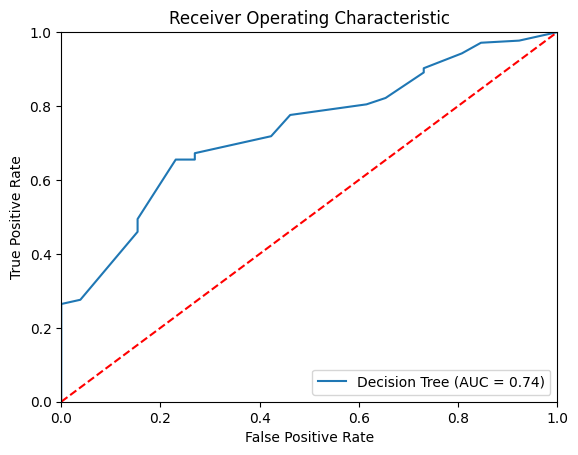

Decision tree with Scores: 0.91


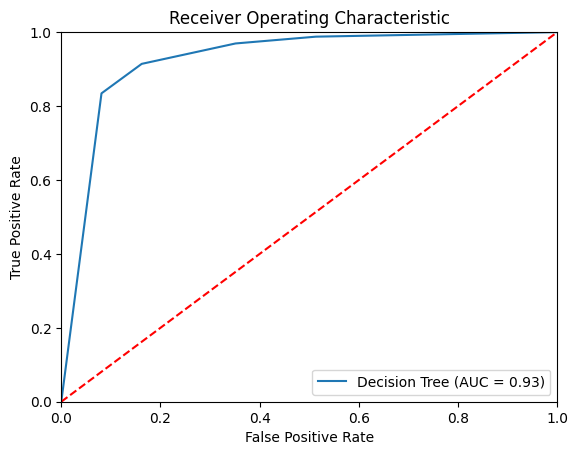

Decision tree with Scores and no race: 0.94


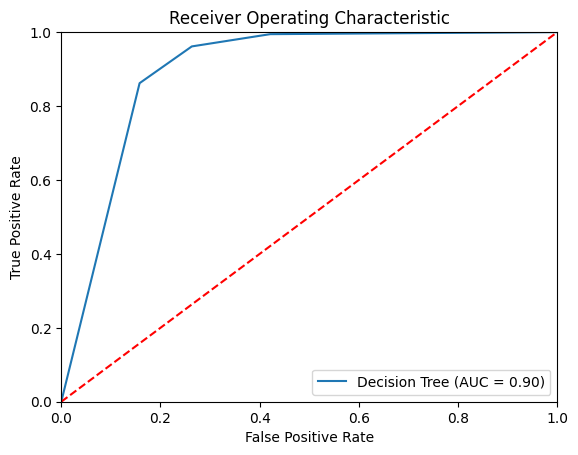

Decision tree with SelectKBest2: 0.865


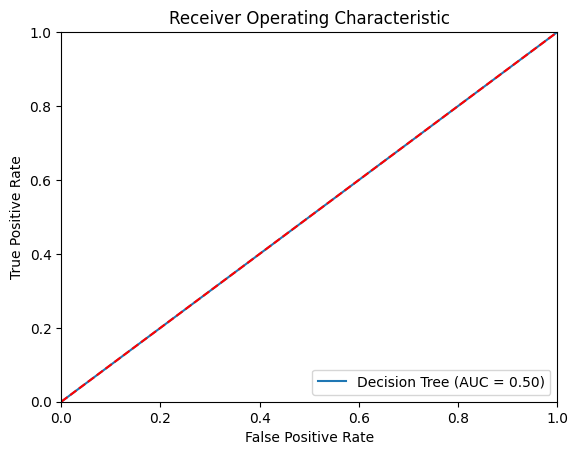

Decision tree with SelectKBest5: 0.82


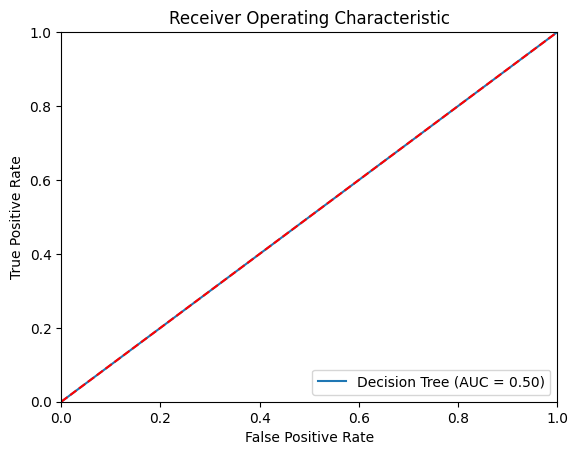

Decision tree with SelectKBest7: 0.85


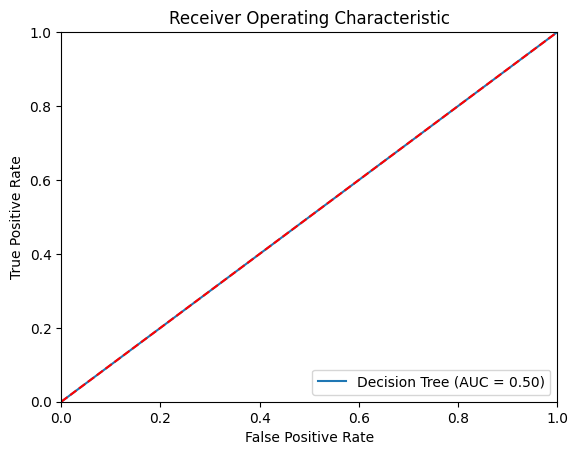


Decision tree average: 0.8721428571428571

Random Forest Classifier with No scores: 0.835


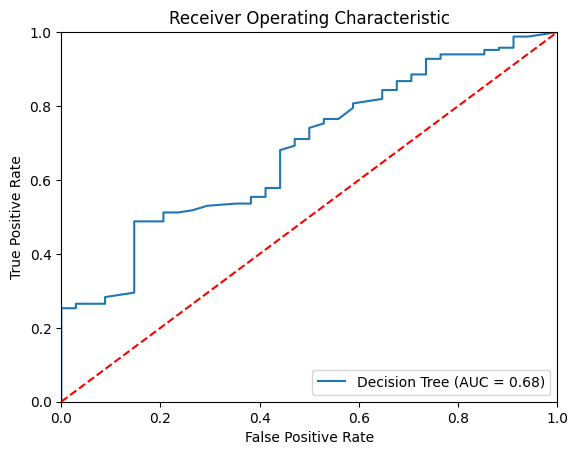

Random Forest Classifier with No scores and no race: 0.84


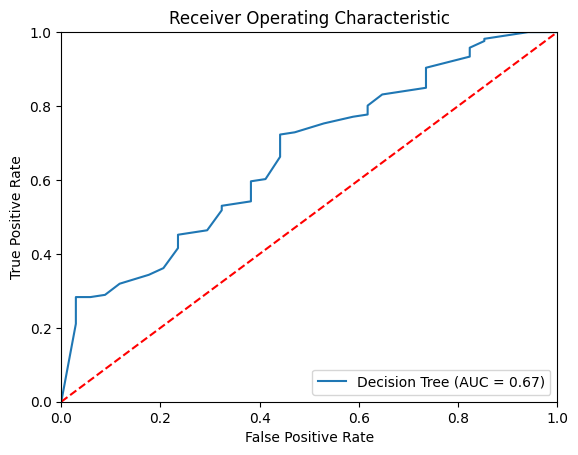

Random Forest Classifier with Scores: 0.87


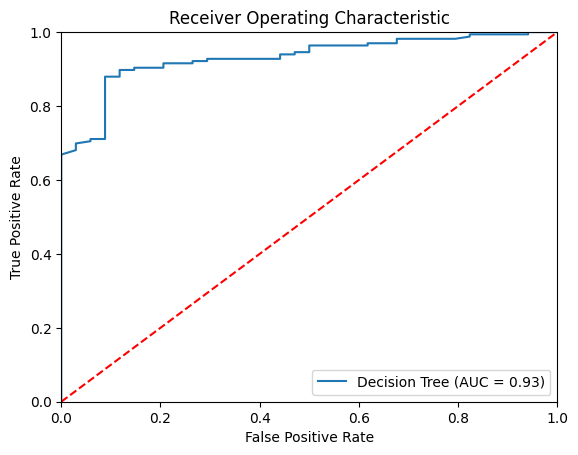

Random Forest Classifier with Scores and no race: 0.885


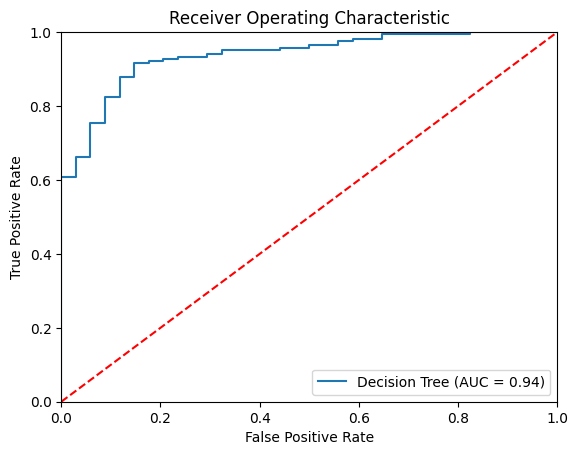

Random Forest Classifier with SelectKBest2: 0.83


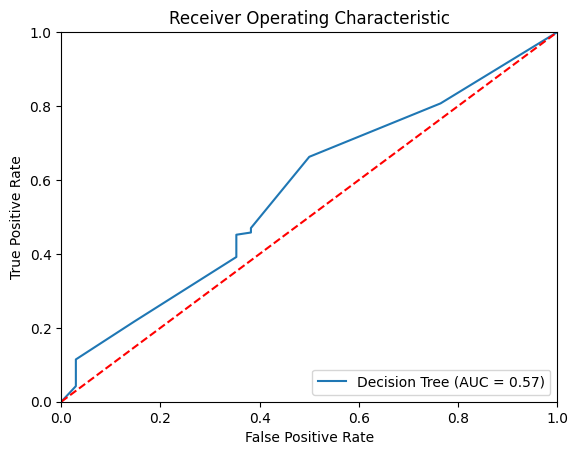

Random Forest Classifier with SelectKBest5: 0.83


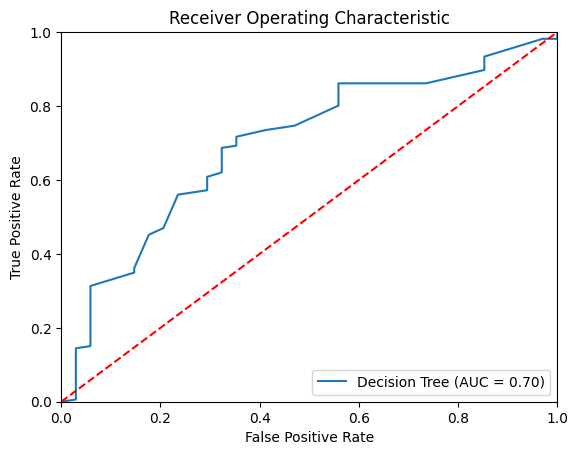

Random Forest Classifier with SelectKBest7: 0.83


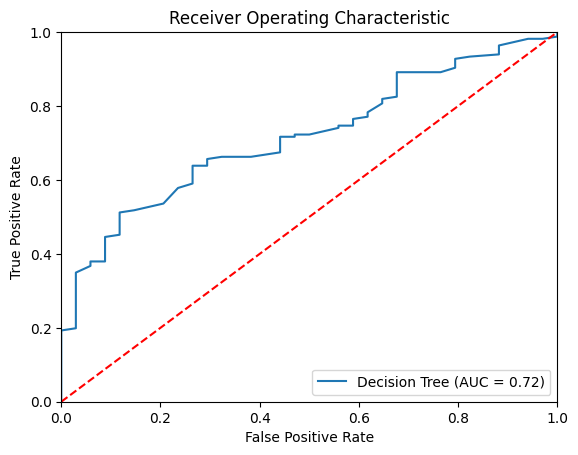


Random Forest Classifier average: 0.8457142857142858

Linear regression with No scores: (RMSE) 13.35269218206746
Linear regression with No scores and no race: (RMSE) 12.711939790533798
Linear regression with Scores: (RMSE) 5.492827176000736
Linear regression with Scores and no race: (RMSE) 5.640126770362654
Linear regression with SelectKBest2: (RMSE) 14.768236946976703
Linear regression with SelectKBest5: (RMSE) 12.593723261019342
Linear regression with SelectKBest7: (RMSE) 13.213289570762058

Linear regression average: 11.11040509967468

Neural Network with No scores: (RMSE) 13.989574599826883
Neural Network with No scores and no race: (RMSE) 13.09503083696874
Neural Network with Scores: (RMSE) 5.2739876172468385
Neural Network with Scores and no race: (RMSE) 5.8374516212302066
Neural Network with SelectKBest2: (RMSE) 14.647311141584302
Neural Network with SelectKBest5: (RMSE) 13.825127479817148
Neural Network with SelectKBest7: (RMSE) 13.344825056450704

Neural Network average: 11.4

In [14]:
import matplotlib.pyplot as plt

def plotRoc(roc_data):
  roc_auc = roc_data[0]
  fpr = roc_data[1]
  tpr = roc_data[2]
  plt.figure()
  plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()

for name, accuracy in logistic_regression_result.items():
  print(f"Logistic regression with {name}: {accuracy}")
  plotRoc(logistic_regression_result_roc[name])
print(f"\nLogistic regression average: {np.average(list(logistic_regression_result.values()))}\n")
for name, accuracy in decision_tree_result.items():
  print(f"Decision tree with {name}: {accuracy}")
  plotRoc(decision_tree_result_roc[name])
print(f"\nDecision tree average: {np.average(list(decision_tree_result.values()))}\n")
for name, accuracy in random_forest_result.items():
  print(f"Random Forest Classifier with {name}: {accuracy}")
  plotRoc(random_forest_result_roc[name])
print(f"\nRandom Forest Classifier average: {np.average(list(random_forest_result.values()))}\n")
for name, accuracy in linear_regression_result.items():
  print(f"Linear regression with {name}: (RMSE) {accuracy}")
print(f"\nLinear regression average: {np.average(list(linear_regression_result.values()))}\n")
for name, accuracy in neural_network_result.items():
  print(f"Neural Network with {name}: (RMSE) {accuracy}")
print(f"\nNeural Network average: {np.average(list(neural_network_result.values()))}\n")
for name, accuracy in voting_regressor_result.items():
  print(f"Voting Regressor with {name}: (RMSE) {accuracy}")
print(f"\nVoting Regressor average: {np.average(list(voting_regressor_result.values()))}\n")